<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Data Gathering

In [2]:
df=pd.read_csv("car_dataset.csv")

In [3]:
df1 = df.copy()

In [4]:
df.head(8)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0


In [5]:
df1.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Data Preparation

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
df.Car_Name.value_counts().head(60)

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
innova                        9
i20                           9
ciaz                          9
grand i10                     8
Royal Enfield Classic 350     7
amaze                         7
jazz                          7
eon                           6
sx4                           6
ertiga                        6
i10                           5
alto k10                      5
swift                         5
Royal Enfield Thunder 350     4
etios liva                    4
Bajaj Pulsar 150              4
ritz                          4
wagon r                       4
dzire                         4
Yamaha FZ S V 2.0             3
Bajaj Pulsar NS 200           3
TVS Apache RTR 160            3
xcent                         3
etios g                       3
etios cross                   3
Honda CB Hornet 160R          3
Bajaj Av

In [9]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [10]:
df.Year.value_counts().head(60)

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2003     2
2007     2
2004     1
2018     1
Name: Year, dtype: int64

In [11]:
df.Selling_Price.value_counts()

0.60     8
0.45     8
4.50     7
5.25     7
4.75     6
        ..
0.51     1
3.15     1
11.45    1
6.85     1
20.75    1
Name: Selling_Price, Length: 156, dtype: int64

In [12]:
df.Present_Price.value_counts()

9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
5.35      1
12.04     1
8.93      1
7.87      1
9.54      1
Name: Present_Price, Length: 147, dtype: int64

In [13]:
df.Kms_Driven.value_counts().head(60)

45000    9
15000    9
35000    5
25000    5
50000    5
40000    5
60000    4
43000    4
6000     4
24000    4
19000    4
26000    3
11000    3
4000     3
32000    3
23000    3
14000    3
12000    3
58000    3
30000    3
7000     3
36000    3
18000    3
33000    2
17000    2
78000    2
89000    2
31427    2
27000    2
5000     2
38000    2
34000    2
16500    2
47000    2
71000    2
49000    2
53000    2
8700     2
29000    2
500      2
6900     2
1300     2
72000    2
3000     2
20000    2
75000    2
62000    2
55138    1
36198    1
53460    1
50024    1
24800    1
2400     1
20273    1
5464     1
3435     1
12500    1
1000     1
51000    1
10079    1
Name: Kms_Driven, dtype: int64

In [14]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [15]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [16]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [17]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [18]:
df = df[df.Owner != 3 ]

In [19]:
df.Owner.value_counts()

0    290
1     10
Name: Owner, dtype: int64

In [20]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2013.653333,4.668500,7.574800,36597.030000,0.033333
std,2.862482,5.089765,8.608174,38473.551916,0.179805
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.875000,1.200000,15000.000000,0.000000
50%,2014.000000,3.625000,6.250000,32000.000000,0.000000
75%,2016.000000,6.000000,9.862500,48191.750000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,1.000000


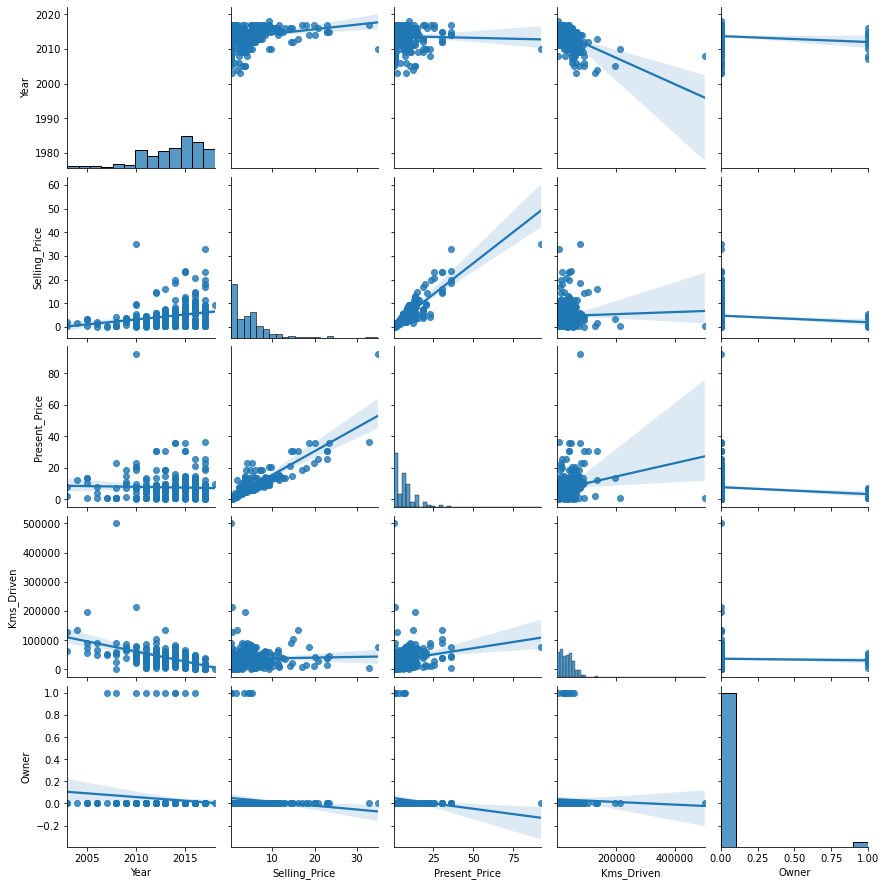

In [21]:
sns.pairplot(df, kind='reg')

<AxesSubplot:>

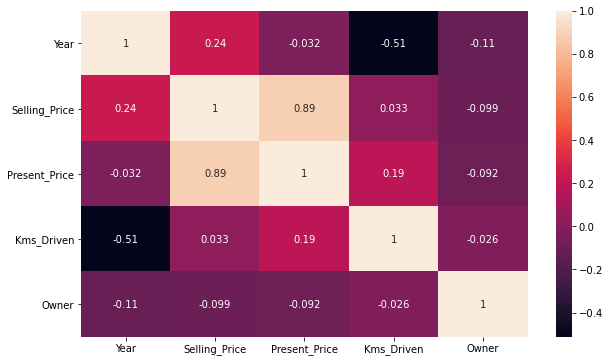

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)

In [23]:
df.skew() 

Year            -1.251987
Selling_Price    2.487561
Present_Price    4.145226
Kms_Driven       6.627001
Owner            5.225634
dtype: float64

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [24]:
df["vehicle_age"] = 2021 - df.Year
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [25]:
df.drop(columns=['Car_Name', "Year"], inplace = True)

In [26]:
df.Fuel_Type.value_counts()

Petrol    238
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [27]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [28]:
df.shape

(300, 8)

In [29]:
df= pd.get_dummies(df,drop_first=True)

In [30]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [31]:
df.shape

(300, 9)

In [32]:
df.drop("Fuel_Type_Diesel", axis=1, inplace=True)

In [33]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,1,0,1
1,4.75,9.54,43000,0,8,0,0,1
2,7.25,9.85,6900,0,4,1,0,1
3,2.85,4.15,5200,0,10,1,0,1
4,4.60,6.87,42450,0,7,0,0,1


In [34]:
df.shape

(300, 8)

### Splitting data into training and testing

In [35]:
y=df.Selling_Price

In [36]:
X=df.drop("Selling_Price",axis=1)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 7)
Train target shape   :  (240,)
Test features shape  :  (60, 7)
Test target shape    :  (60,)


##  Model Building (Linear Regression)

In [38]:
LinearRegression().fit(X_train, y_train)

LinearRegression()

In [39]:
model = LinearRegression(normalize = True)

In [40]:
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [41]:
model.coef_

array([ 4.53946016e-01, -2.75258076e-05,  3.13891225e-01, -2.57842871e-01,
       -2.10190114e+00, -1.21660419e+00, -1.52945925e+00])

In [42]:
model.intercept_

7.46167726903456

In [43]:
print("Model intercept  : ", model.intercept_, "\n")

for i in range(len(X.columns)):
    print(X.columns[i], ": ", model.coef_[i])

Model intercept  :  7.46167726903456 

Present_Price :  0.4539460157595102
Kms_Driven :  -2.7525807599408e-05
Owner :  0.31389122493514043
vehicle_age :  -0.25784287140535145
Fuel_Type_Petrol :  -2.101901141518026
Seller_Type_Individual :  -1.2166041912788288
Transmission_Manual :  -1.5294592497156445


# Interpret the model

In [44]:
y_pred = model.predict(X_test)

In [45]:
y_pred

array([ 14.53447102,   6.98903557,   4.70089865,   2.72024123,
         2.20383543,   6.00617848,   6.64926969,   4.74710601,
         7.52710825,   4.20337504,   2.12757672,   1.13713899,
        -1.67189608,   4.19147006,   7.76878027,   4.90884194,
         1.74198414,   4.23963562,   6.52599133,   4.65807386,
        10.32743946,   1.0182851 ,   4.4677161 ,   7.91038166,
        16.15423423,   9.11444943,  -0.19408669,   9.82815123,
        10.75511981,   1.89469681,   0.24851492,   1.13190286,
         4.22593008,  19.8336629 ,   6.89790625,   5.07109079,
         5.3249152 ,  11.00219146,   9.89891216,   0.77098558,
        -0.35547884,   8.74843626, -12.73563726,   4.66142649,
         7.35053426,   8.68707169,  -5.6089126 ,   4.20801078,
         6.78780302,   2.45208743,  16.89990383,   1.10503433,
         5.06683535,   4.44213016,   0.49930647,   2.96656263,
         4.18727679,  -1.75727951,   3.75051296,   8.09073075])

In [46]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [47]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
66,19.75,14.534471,5.215529
240,5.35,6.989036,-1.639036
251,5.00,4.700899,0.299101
225,2.70,2.720241,-0.020241
24,2.90,2.203835,0.696165
287,5.75,6.006178,-0.256178
235,9.10,6.649270,2.450730
234,5.50,4.747106,0.752894
49,7.75,7.527108,0.222892
294,3.75,4.203375,-0.453375


In [48]:
result_sample = comparing.head(25)
result_sample

,Actual,Pred,Residual
66,19.75,14.534471,5.215529
240,5.35,6.989036,-1.639036
251,5.00,4.700899,0.299101
225,2.70,2.720241,-0.020241
24,2.90,2.203835,0.696165
287,5.75,6.006178,-0.256178
235,9.10,6.649270,2.450730
234,5.50,4.747106,0.752894
49,7.75,7.527108,0.222892
294,3.75,4.203375,-0.453375


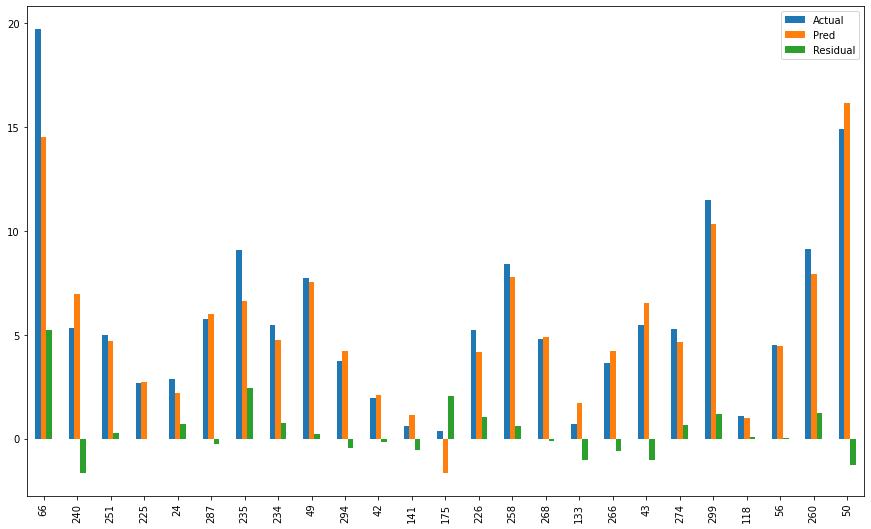

In [49]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

# Model Evaluation

In [50]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [51]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7429139907459961
MAE 		: 1.4386682942766593
MSE 		: 5.994909267347482
RMSE 		: 2.4484503808220173


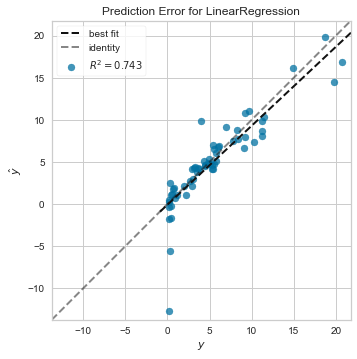

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [52]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
lm= LinearRegression(normalize=True)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [53]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

result_sample = results.head(25)
result_sample

,Actual,Predicted
66,19.75,14.534471
240,5.35,6.989036
251,5.00,4.700899
225,2.70,2.720241
24,2.90,2.203835
287,5.75,6.006178
235,9.10,6.649270
234,5.50,4.747106
49,7.75,7.527108
294,3.75,4.203375


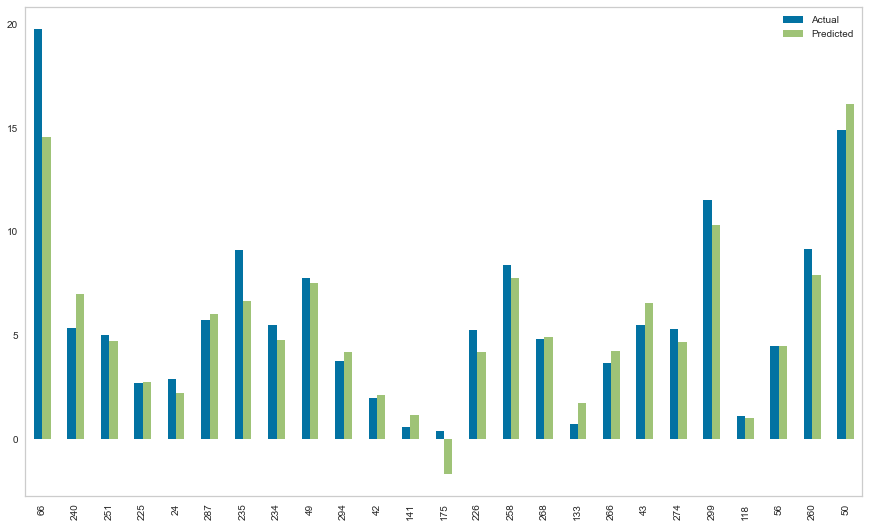

In [54]:
result_sample.plot(kind='bar',figsize=(15,9))
plt.grid(linestyle=':', linewidth='0.5', color='green')
plt.show()

# Regularization

# Ridge

In [55]:
def show_metrics(y_test, y_pred):
    rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
    mae=mean_absolute_error(y_test,y_pred)
    R2_score=r2_score(y_test,y_pred)
    print("Model testing performance:")
    print("--------------------------")
    print('RMSE is {:29}'.format(rmse))
    print("MAE is {:30}".format(mae))
    print('R2 score is {:26}'.format(R2_score))

In [56]:
from sklearn.linear_model import Ridge, RidgeCV

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
X_train

array([[0.01226528, 0.00355915, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.01085423, 0.0533873 , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.19722132, 0.04169294, 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.01552155, 0.02491407, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.00303918, 0.30252802, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.05676761, 0.17438325, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [60]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [61]:
show_metrics(y_test, y_pred)

Model testing performance:
--------------------------
RMSE is            2.0646811526445092
MAE is             1.4283602520788379
R2 score is         0.8171892143748188


In [62]:
ridge_model.alpha

1.0

In [63]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [64]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [65]:
ridgecv.alpha_

0.1

In [66]:
alpha_space = np.linspace(0.01, 20, 100)
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 2.11919192e-01, 4.13838384e-01, 6.15757576e-01,
       8.17676768e-01, 1.01959596e+00, 1.22151515e+00, 1.42343434e+00,
       1.62535354e+00, 1.82727273e+00, 2.02919192e+00, 2.23111111e+00,
       2.43303030e+00, 2.63494949e+00, 2.83686869e+00, 3.03878788e+00,
       3.24070707e+00, 3.44262626e+00, 3.64454545e+00, 3.84646465e+00,
       4.04838384e+00, 4.25030303e+0...
       1.53558586e+01, 1.55577778e+01, 1.57596970e+01, 1.59616162e+01,
       1.61635354e+01, 1.63654545e+01, 1.65673737e+01, 1.67692929e+01,
       1.69712121e+01, 1.71731313e+01, 1.73750505e+01, 1.75769697e+01,
       1.77788889e+01, 1.79808081e+01, 1.81827273e+01, 1.83846465e+01,
       1.85865657e+01, 1.87884848e+01, 1.89904040e+01, 1.91923232e+01,
       1.93942424e+01, 1.95961616e+01, 1.97980808e+01, 2.00000000e+01]),
        cv=10)

In [67]:
ridgecv.alpha_

0.21191919191919192

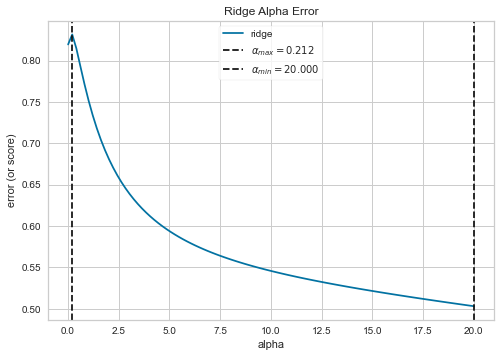

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [68]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.01, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [69]:
ridge_model = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
show_metrics(y_test, y_pred)

Model testing performance:
--------------------------
RMSE is            2.2114526503712226
MAE is             1.4013793495303142
R2 score is         0.7902745579403128


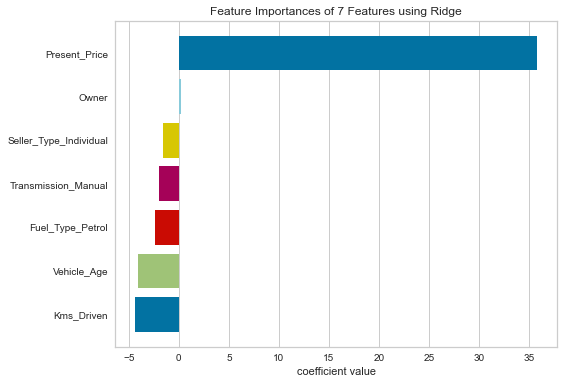

<AxesSubplot:title={'center':'Feature Importances of 7 Features using Ridge'}, xlabel='coefficient value'>

In [70]:
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

# Lasso

In [71]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [72]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is             4.555789422131122
MAE is             3.1793343854447214
R2 score is        0.10993215438169457


In [73]:
alpha_space = np.linspace(0.001, 10, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)

In [74]:
y_pred=lasso_cv_model.predict(X_test)
show_metrics(y_test,y_pred)

Model testing performance:
--------------------------
RMSE is            2.4247798241787217
MAE is             1.4336060249303295
R2 score is         0.7478607551464511


In [75]:
lasso_cv_model.alpha_

0.001

In [76]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [77]:
def evaluate_model(Model, lambdas):
    training_errors = [] 
    testing_errors = [] 
    for l in lambdas:

        model = Model(alpha=l) 
        model.fit(X_train, y_train)

        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)

        testing_predictions = model.predict(X_test)
        testing_mse = mean_squared_error(y_test, testing_predictions)
        testing_errors.append(testing_mse)
    return training_errors, testing_errors

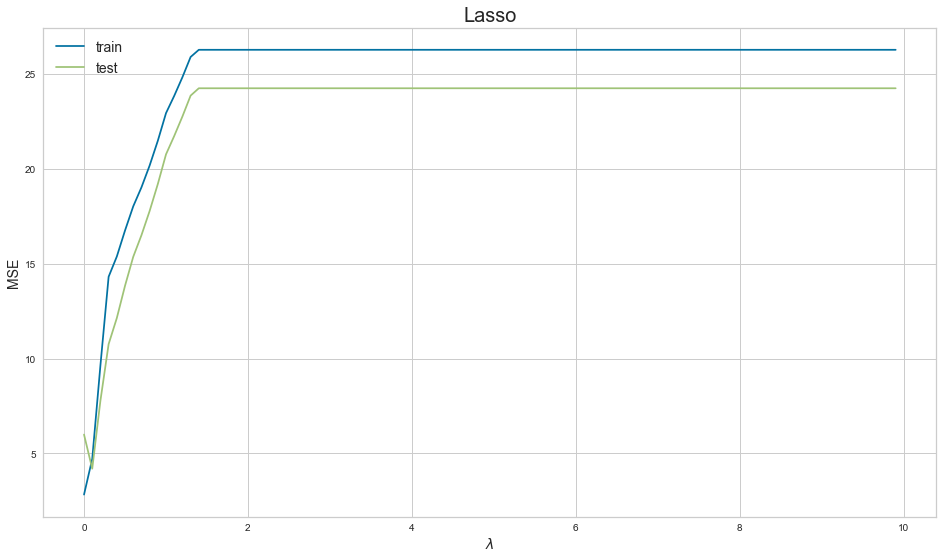

In [78]:
lambdas = np.arange(0, 10, step=0.1)
lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")